# 머신러닝(Machine Learning)

## 의사결정나무(Decision Tree Classification) - 와인 품질 예측 예제

### 1. 데이터 전처리(data pre-processing)

In [3]:
# 구글 드라이브와 Colab 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandas 사용을 위한 라이브러리 불러오기
import pandas as pd

# 데이터 불러오기 - WineQuality_Red.csv
path = "" # csv 파일의 경로를 적어주세요
data = pd.read_csv(path)

In [122]:
# 앞의 5개 데이터 살펴보기
data.rename(columns={'Class':'quality'}, inplace=True)
data.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


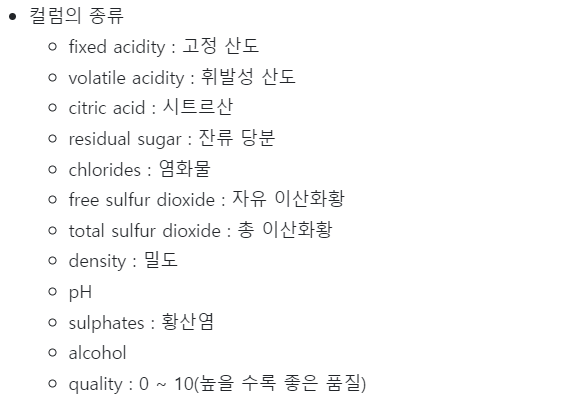

- 전부 연속형 변수입니다. 그래프로 변수를 분석할 수 있겠네요

In [123]:
# 행, 열(row, column) 확인
data.shape

(1597, 12)

- 저번주에 비해 데이터의 양이 3배 정도 많네요(boston의 행 수: 506). 이번주는 데이터를 더 면밀히 살펴야하겠습니다.

In [124]:
# 결측치 확인
data.isnull().sum()  # isnull(): 빈 칸이 있으면 1, 없으면 0. 기억나지요?

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

- 결측치는 없는 것으로 확인 됩니다. 그렇다면 이상치는?

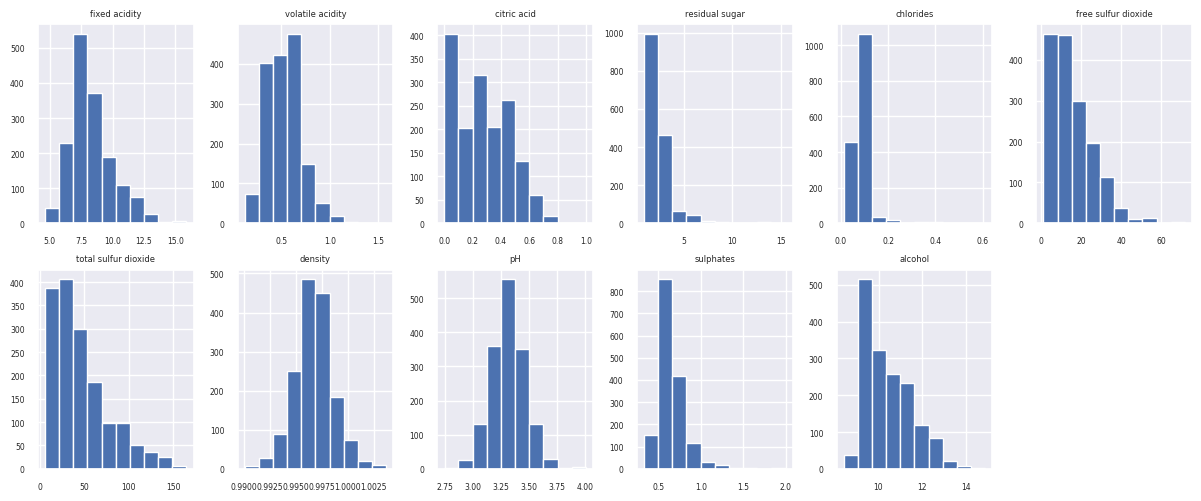

In [125]:
# 이상치는 숫자로 보는 것보다 그래프로 보는 것이 더 좋습니다.
# 우리 그림을 그려서 한번 살펴봅시다.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

for i in range(1,12):
    plt.subplot(2,6,i)
    plt.hist(data.iloc[:,i])
    plt.title(data.columns[i])

plt.tight_layout()
plt.show()

-

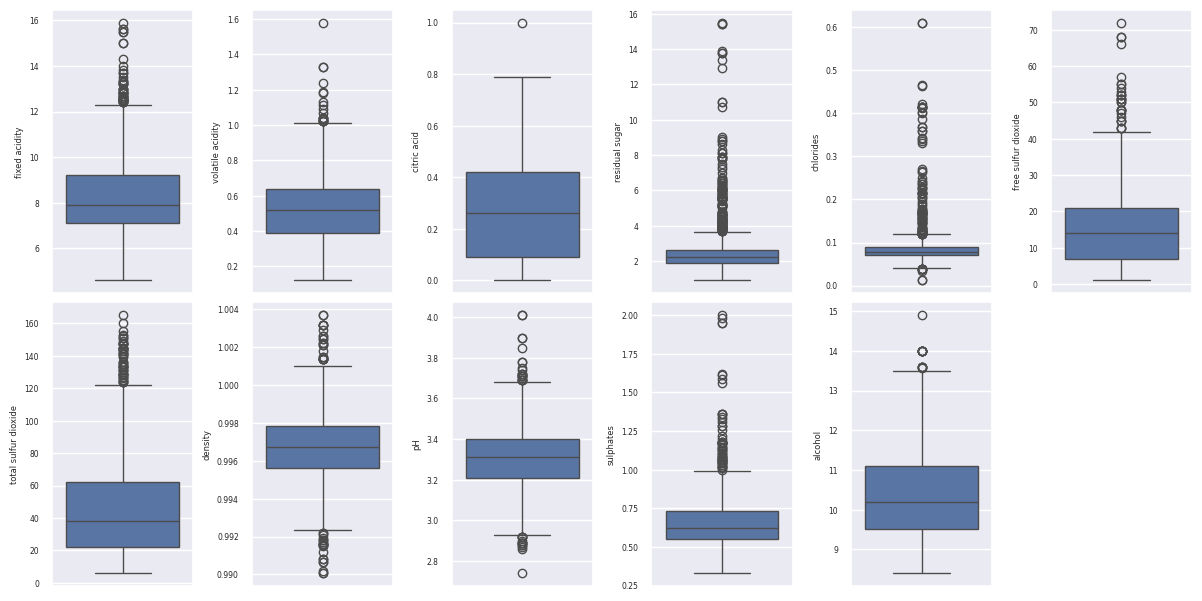

In [109]:
# 박스 플롯으로 이상치 확인
plt.figure(figsize=(12,6))

for i in range(1,12):
    plt.subplot(2,6,i)
    sns.boxplot(data.iloc[:,i])

plt.tight_layout()
plt.show()

- "total sulfur dioxide" 특성에 큰 이상치가 존재하는 것을 확인할 수 있습니다.

In [110]:
# 따라서 200 이상의 "total sulfur dioxide"를 가지는 값을 없애줍시다.

data = data[data["total sulfur dioxide"]<200] # data["total sulfur dioxide"] < 200 의 조건을 만족하는 값만 찾는 코드입니다.
data.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<Axes: ylabel='total sulfur dioxide'>

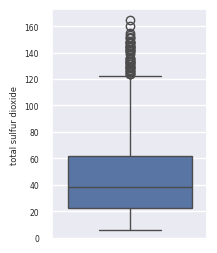

In [111]:
# 실제로 제거 되었는지 다시 한번 확인해봅시다

plt.figure(figsize=(2, 3))
sns.boxplot(data.iloc[:,7])

- 잘 제거된 것 같습니다! 이번에는 상관관계분석을 해봅시다.

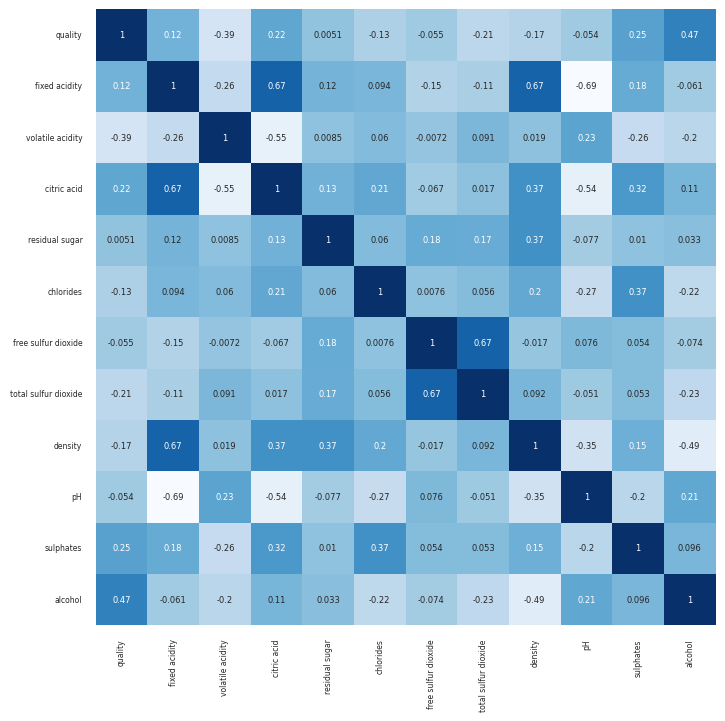

In [112]:
# 상관관계 계산
correlation = data.corr()

# 상관관계를 시각화 (히트맵 표시)
plt.figure(figsize=(8,8))
sns.set(font_scale=0.5)
sns.heatmap(correlation, annot=True, cbar=False, cmap='Blues')
plt.show()

- Class(등급)와의 관계를 추출하여 다시 확인해봅시다.

In [113]:
price_corr = correlation.loc['fixed acidity':, 'quality'].abs().sort_values(ascending=False) # abs()는 절댓값, sort_values()는 정렬, 기억나시죠?
price_corr

alcohol                 0.474208
volatile acidity        0.388955
sulphates               0.253822
citric acid             0.222943
total sulfur dioxide    0.207581
density                 0.171592
chlorides               0.127500
fixed acidity           0.124790
free sulfur dioxide     0.055279
pH                      0.053828
residual sugar          0.005146
Name: quality, dtype: float64

In [114]:
# 어라? 상관관계가 거의 없습니다. 이런 경우에는 선형회귀모델은 적합한 모델이 아니라고 할 수 있습니다.
# 그렇다면 이번 시간에 배운 분류 모델, Decision Tree Classification을 사용해봅시다.

# 모델을 학습하기에 앞서, 모든 특징(변수)들의 범위가 달랐던 것을 보셨을까요?
# 다시 위로 올라가서 확인을 해보면 어떤 변수들의 간격은 소숫점 단위인 반면, 어떤 변수들은 10, 심하면 100 단위의 간격을 가지고 있습니다.
# 이렇게 되면 모델이 큰 수를 가진 변수를 중요한 변수라고 착각하고 훈련되는 문제가 발생하기에, 분포를 모두 동일하게 조절해주겠습니다.

# 여기서 주의하셔야 할 점이 있는데요, 학습 데이터(train data)와 검증 데이터(test data)를 분리 한 후 범위를 조절해주어야 한다는 점입니다.
# 제가 계속해서 제공드리는 데이터는 학습 데이터와 검증 데이터를 하나의 데이터로부터 분리하는 방식으로 모델을 학습, 검증했는데요
# 실제 대회나 연구에 사용되는 데이터는 학습 데이터와 검증 데이터를 따로 제공합니다.

# 만약 저희가 분포를 조절한 후에 나누어주게 되면, 검증 데이터가 훈련 데이터에 영향을 주는 꼴이 되어버립니다.
# 이것을 "Data Leakage"라고 부르는데요, 대회나 연구에서 치명적인 결함으로 인식됩니다.

# 따라서 분포를 조절하되, 학습 데이터와 검증 데이터에 따로 적용해주는 방식을 사용해야합니다.
# 사족이 길었는데, 아무튼 우선 데이터를 분류해봅시다.

#### 2) 데이터 분할과 표준화(Standardization)

In [115]:
# 학습 데이터와 검증 데이터 분할
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 지정
X = data.drop(["quality"], axis=1)
Y = data["quality"]

# train data와 test data를 8:2로 나누어 줍시다.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'ytest: {ytest.shape}')

xtrain: (1277, 11)
xtest: (320, 11)
ytrain: (1277,)
ytest: (320,)


In [116]:
# 각각의 분포를 조절해줍시다. 분포 조절 방식은 "표준화(standardization)"를 사용하겠습니다.

scaled_xtrain = (xtrain-xtrain.mean())/xtrain.std()
scaled_xtest = (xtest-xtest.mean())/xtest.std()

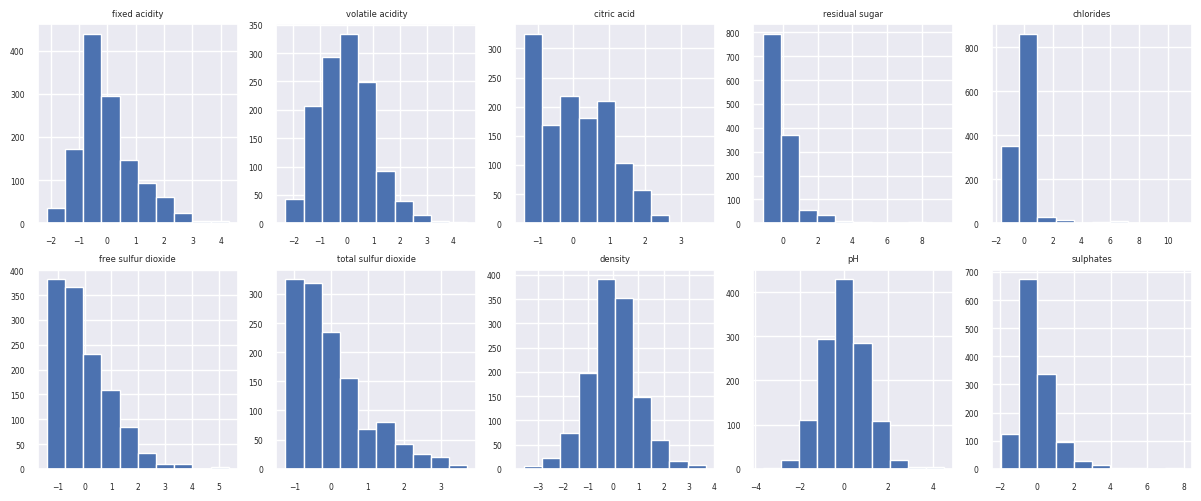

In [117]:
# 표준화로 데이터의 분포가 잘 조절되었는지 보겠습니다.

plt.figure(figsize=(12,5))

for i in range(1,11):
    plt.subplot(2,5,i)
    plt.hist(scaled_xtrain.iloc[:,i-1])
    plt.title(scaled_xtrain.columns[i-1])

plt.tight_layout()
plt.show()

#### 3) 데이터 훈련 및 정확도 확인

In [118]:
# 데이터들이 비교가능한 범위로 조절되었습니다!
# 이제 이를 이용해서 분류를 진행해봅시다.
# 데이터가 준비되었으니 이제 모델을 학습시킵시다.
from sklearn.tree import DecisionTreeClassifier

# 모델을 지정
model = DecisionTreeClassifier(criterion='entropy', max_features=0.4, random_state=2024)

# 모델을 학습
model.fit(scaled_xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(scaled_xtest)

In [119]:
# 분류의 경우 정확도를 구하는 방식이 다르므로, 지금과는 다른 라이브러리를 불러옵시다
from sklearn.metrics import accuracy_score

decisiontree_acc = accuracy_score(ytest, y_pred)

print(f'Accuracy: {decisiontree_acc*100:.2f}%')

Accuracy: 61.25%


In [120]:
# 정확도가 나쁘지 않습니다!
# 랜덤 포레스트를 사용하면 정확도를 더 높일 수 있던 것을 기억하시나요?
# 이번에도 랜덤포레스트를 사용하여 정확도를 더 높혀봅시다!
from sklearn.ensemble import RandomForestClassifier

# 모델을 지정
model = RandomForestClassifier(criterion='entropy', max_features=0.4, n_estimators=300, random_state=2024)

# 모델을 학습
model.fit(scaled_xtrain, ytrain)

# 테스트 결과 예측
y_pred = model.predict(scaled_xtest)

In [121]:
randomforest_acc = accuracy_score(ytest, y_pred)

print(f'Accuracy: {randomforest_acc*100:.2f}%')

Accuracy: 72.50%


- 정확도가 꽤 많이 증가하는 것을 볼 수 있습니다!
- 정확도를 높이는 방법중에 시도하지 않은 방법이 있는데, 바로 max_features와 같은 세세한 설정을 변경하는 것입니다.
- 머신러닝에서는 이런 변수를 조절하는 것을 두고 Hyperparameter Tunning이라고 하는데, 조절 가능한 변수를 Hyperparameter라고 합니다.
- Hyperparameter 조절도 머신러닝에서 중요한 요소 중 하나이니 꼭 기억해주세요!

- 벌써 수업의 절반을 달려왔습니다! 지금까지 따라오신 분들 너무 고생하셨습니다.
- 여러분이 제 기대보다 너무 잘해서, 중간 이후부터는 딥러닝에 대해서 배워보겠습니다.
- 딥러닝은 머신러닝에 비해 더 재밌고, 활용할 곳도 많으니 다들 재밌게 들어주시면 감사하겠습니다.
- 그럼, 중간고사 모두 화이팅하세요!